In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aac_df = pd.read_csv('aac_intakes_outcomes.csv')  
aac_df["whole_shelter_days"] = np.ceil(aac_df["time_in_shelter_days"])
aac_df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,whole_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,1.0
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,2.0
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,2.0
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,5.0
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,1.0


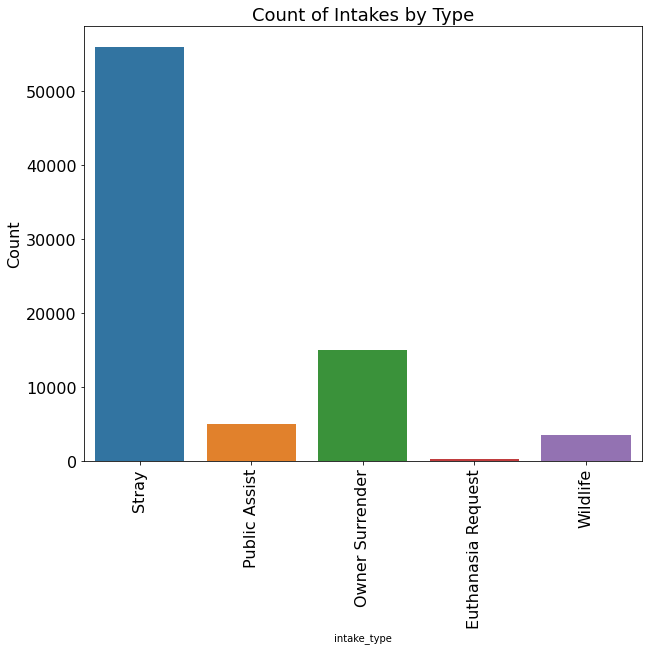

In [3]:
plt.figure(figsize=(10, 8))
sns.countplot(x='intake_type', data=aac_df, orient='v')
plt.title('Count of Intakes by Type', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=16);

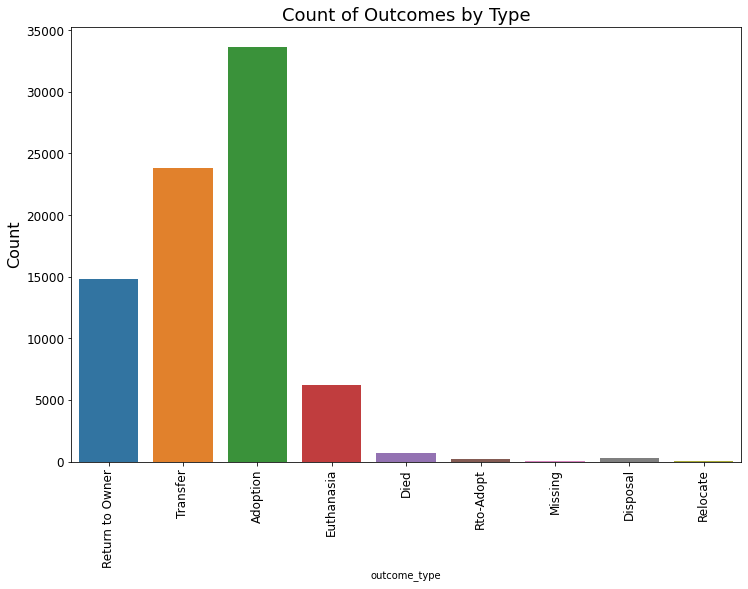

In [4]:
plt.figure(figsize=(12, 8))
sns.countplot(x='outcome_type', data=aac_df, orient='v')
plt.title('Count of Outcomes by Type', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=12);

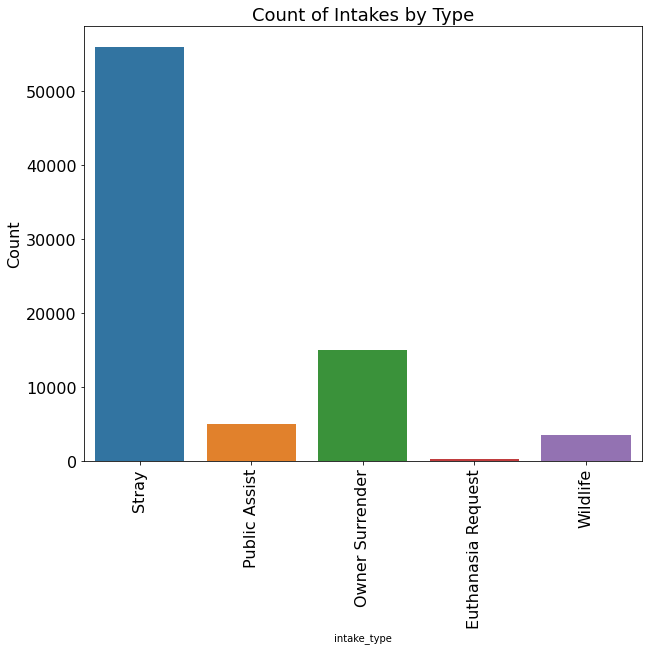

In [5]:
plt.figure(figsize=(10, 8))
sns.countplot(x='intake_type', data=aac_df, orient='v')
plt.title('Count of Intakes by Type', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=16);

/Users/marisolmondragon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/marisolmondragon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-6-9d081e380789>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


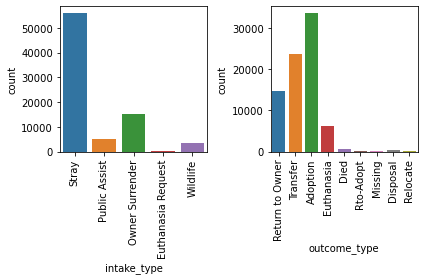

In [6]:
fig, ax =plt.subplots(1,2)
sns.countplot(aac_df['intake_type'], ax=ax[0])
sns.countplot(aac_df['outcome_type'], ax=ax[1])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    fig.tight_layout()
fig.show()

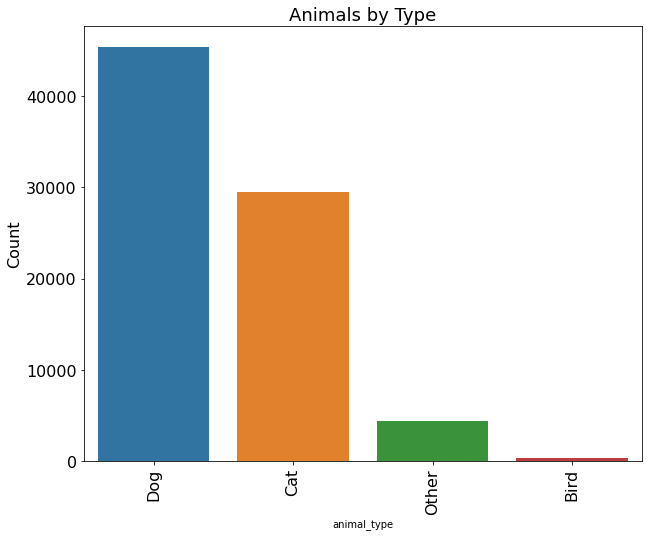

In [7]:
plt.figure(figsize=(10, 8))
sns.countplot(x='animal_type', data=aac_df, orient='v')
plt.title('Animals by Type', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=16);

/Users/marisolmondragon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top Breeds')

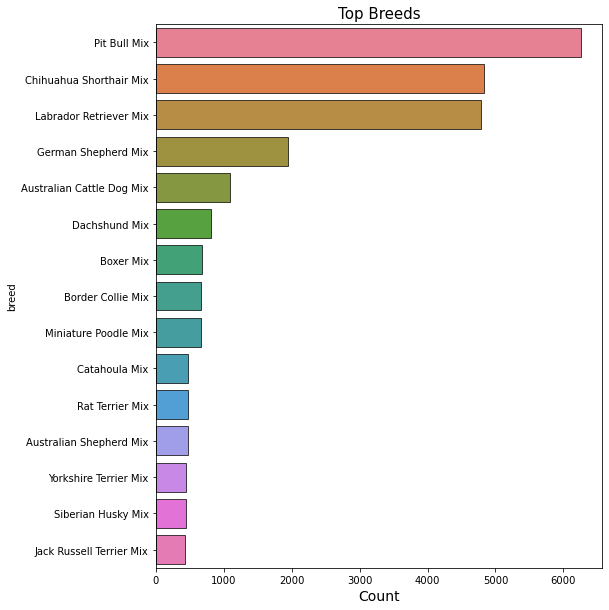

In [8]:
dogs = aac_df[aac_df['animal_type']=='Dog']
breed=dogs.groupby(['breed'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
top_breed=breed.head(15)
# Bar plot
fig = plt.figure(figsize=(8,10))
sns.barplot('count','breed',
                 data=top_breed, palette='husl', linewidth=0.7, edgecolor='k')
plt.xlabel('Count', fontsize=14)
plt.title( 'Top Breeds', fontsize=15)

In [9]:
pitbull = aac_df[aac_df['animal_type']=='Dog']
pitbull_df = pitbull[pitbull['breed']=='Pit Bull Mix']

In [10]:
pitbull_df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days',
       'whole_shelter_days'],
      dtype='object')

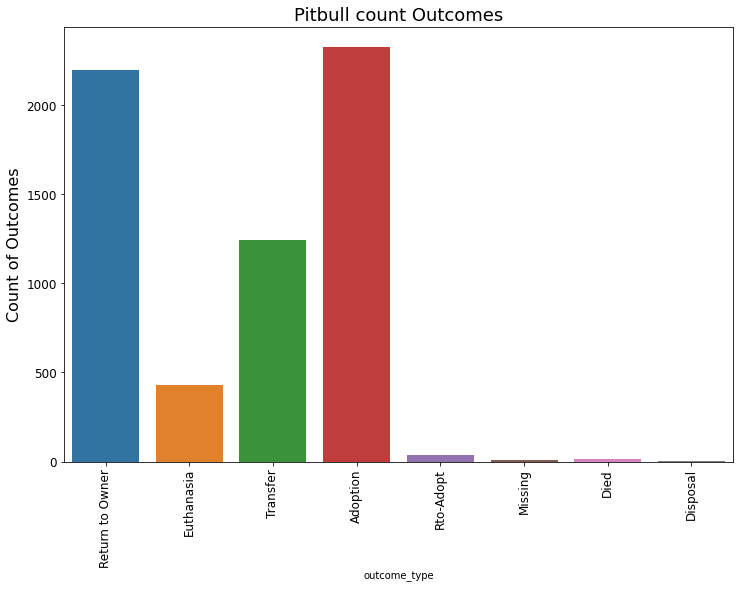

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(x='outcome_type', data=pitbull_df, orient='v')
plt.title('Pitbull count Outcomes', fontsize=18)
plt.ylabel('Count of Outcomes', fontsize=16)
plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=12);

In [12]:
pitbull_df['whole_shelter_days'].max()

1269.0

In [13]:
pitbull_df['whole_shelter_days'].min()

1.0

<ipython-input-14-810e626f989f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aac_adopted['outcome_day'] = pd.DatetimeIndex(aac_adopted['outcome_datetime']).day


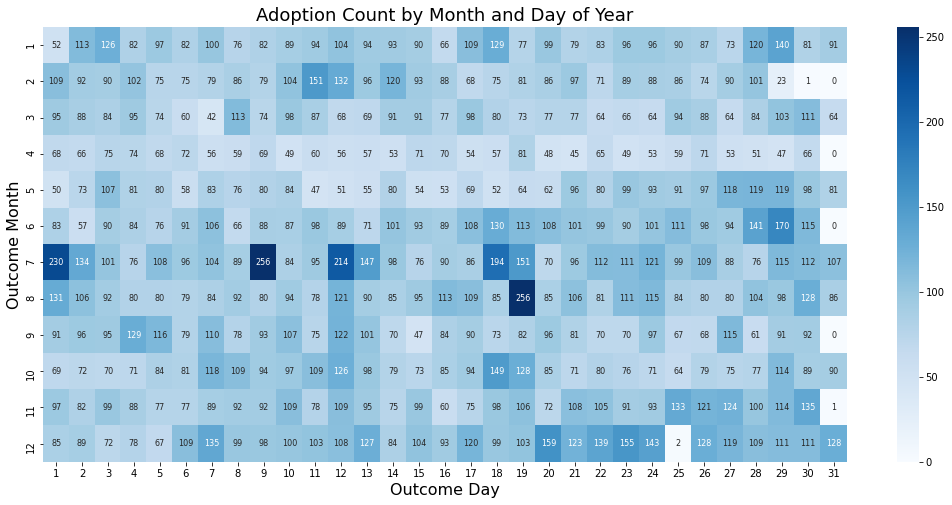

In [14]:
aac_adopted = aac_df.loc[aac_df['outcome_type']=='Adoption']
aac_adopted['outcome_day'] = pd.DatetimeIndex(aac_adopted['outcome_datetime']).day
outcome_md = aac_adopted.groupby(['outcome_day','outcome_month'])[['count']].sum()
outcome_md = outcome_md.reset_index(level=[0,1])
pivoted_table = outcome_md.pivot(index='outcome_month', columns='outcome_day', values='count')
pivoted_table.fillna(0, inplace=True)
plt.figure(figsize=(18, 8))
sns.heatmap(pivoted_table, cmap='Blues', annot=True, fmt='g', annot_kws={'size': 8})
plt.title('Adoption Count by Month and Day of Year', fontsize=18);
plt.xlabel('Outcome Day', fontsize=16)
plt.ylabel('Outcome Month', fontsize=16);

ValueError: 'c' argument has 3 elements, which is inconsistent with 'x' and 'y' with size 31780.

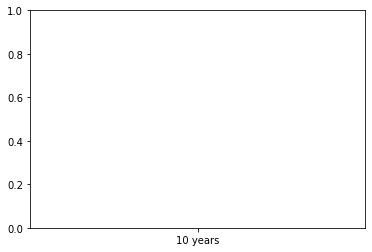

In [21]:
dog_outcomes = aac_df.loc[(aac_df["animal_type"]=="Dog") & 
                                       ((aac_df["outcome_type"] == "Adoption")|
                                        (aac_df["outcome_type"] == "Transfer")|
                                        (aac_df["outcome_type"] == "Euthanasia"))]
x=dog_outcomes['age_upon_intake']
y=dog_outcomes['whole_shelter_days']
clr = {'Adoption':'blue','Transfer':'yellow','Euthanasia': 'red'}
plt.scatter(x,y,c = color_map)
color_map = [color for color in clr.values()[:len(x)]]
plt.title('Age On Intake vs Days Before Outcome')
plt.xticks(range(0,20))
plt.xlabel('Age in Years')
plt.ylabel('Days in Shelter')

In [ ]:
pitbull_adopted = pitbull_df.loc[pitbull_df['outcome_type']=='Adoption']

In [ ]:
pitbull_adopted.sort_values(by=['whole_shelter_days'], ascending=False)

In [ ]:
pitbull_adopted.plot.scatter(x='sex_upon_outcome',y='whole_shelter_days')

In [ ]:
aac_df.columns

In [ ]:
intake_year_count = aac_df['intake_year'].value_counts().sort_index()
intake_year_count.plot()

In [ ]:
aac_df['animal_id_outcome'].value_counts()

In [ ]:
aac_df[aac_df['animal_id_outcome'] == 'A718223']

In [ ]:
new_df = aac_df.loc[(aac_df['intake_year'] <= 2014) ]

In [ ]:
new_df = new_df.dropna(how='all')

In [ ]:
new_df['outcome_type'].value_counts()

In [ ]:
new_df["outcome_type"] = new_df["outcome_type"].replace({'Adoption': 1, 'Transfer':0, 'Return to Owner':1
                                                         ,'Euthanasia':0, 'Died': 0, 'Disposal':0,'Missing':0,
                                                         'Relocate':0})

This graphs represent the percents of outcome type from each column and their unique categories.

In [ ]:
animal_types = aac_df["animal_type"].unique()

plt.figure(figsize=(10,10))
plt.xlabel('Animal Type')
plt.ylabel('Number Days in Shelter')
for animal in animal_types:
    x = aac_df[aac_df['animal_type'] == animal]['animal_type']
    y = aac_df[aac_df['animal_type'] == animal]['whole_shelter_days']
    plt.scatter(x,y, marker='.', label=animal)
plt.legend()

In [ ]:
for i in new_df.columns:
    if len(new_df[i].unique())<36:
        m = (new_df.groupby(i)['outcome_type'].sum())/new_df.groupby(i)['outcome_type'].count()
        m.plot.bar(color='blue')
        plt.show()

In [ ]:
new_df.corr()

In [ ]:
animal_types = new_df["animal_type"].unique()

plt.figure(figsize=(10,10))
plt.xlabel('Animal Type')
plt.ylabel('Number Days in Shelter')
for animal in animal_types:
    x = new_df[new_df['animal_type'] == animal]['animal_type']
    y = new_df[new_df['animal_type'] == animal]['whole_shelter_days']
    plt.scatter(x,y, marker='.', label=animal)
plt.legend()

In [ ]:
animal_types = aac_df["animal_type"].unique()

plt.figure(figsize=(10,10))
plt.xlabel('Animal Type')
plt.ylabel('Number Days in Shelter')
for animal in animal_types:
    x = aac_df[aac_df['animal_type'] == animal]['animal_type']
    y = aac_df[aac_df['animal_type'] == animal]['whole_shelter_days']
    plt.scatter(x,y, marker='.', label=animal)
plt.legend()